In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
#cencus data
df_pop_raw = pd.read_csv('PopulationEstimates.csv',encoding='latin1')
df_pop_raw.head()

,FIPStxt,State,Area_Name,Attribute,Value
0,0,US,United States,CENSUS_2020_POP,331449281.0
1,0,US,United States,ESTIMATES_BASE_2020,331464948.0
2,0,US,United States,POP_ESTIMATE_2020,331526933.0
3,0,US,United States,POP_ESTIMATE_2021,332048977.0
4,0,US,United States,POP_ESTIMATE_2022,333271411.0


In [6]:
#header cleaning
df_pop_raw.columns = df_pop_raw.columns.str.strip().str.lower().str.replace(' ', '_')
df_pop_raw.columns

Index(['fipstxt', 'state', 'area_name', 'attribute', 'value'], dtype='object')

In [7]:
#fips code cleaning
df_pop_raw['fips_code'] = df_pop_raw['fipstxt'].astype(str).str.zfill(5)
df_pop_raw['fips_code']

,fips_code
0,00000
1,00000
2,00000
3,00000
4,00000
...,...
208220,72153
208221,72153
208222,72153
208223,72153


In [8]:
#filtering estimates
df_pop = df_pop_raw[(df_pop_raw['attribute'] == 'POP_ESTIMATE_2023') &(~df_pop_raw['fips_code'].str.endswith('000'))].copy()
df_pop

,fipstxt,state,area_name,attribute,value,fips_code
126,1001,AL,Autauga County,POP_ESTIMATE_2023,60342.0,01001
191,1003,AL,Baldwin County,POP_ESTIMATE_2023,253507.0,01003
256,1005,AL,Barbour County,POP_ESTIMATE_2023,24585.0,01005
321,1007,AL,Bibb County,POP_ESTIMATE_2023,21868.0,01007
386,1009,AL,Blount County,POP_ESTIMATE_2023,59816.0,01009
...,...,...,...,...,...,...
208188,72145,PR,Vega Baja Municipio,POP_ESTIMATE_2023,53527.0,72145
208197,72147,PR,Vieques Municipio,POP_ESTIMATE_2023,7999.0,72147
208206,72149,PR,Villalba Municipio,POP_ESTIMATE_2023,21285.0,72149
208215,72151,PR,Yabucoa Municipio,POP_ESTIMATE_2023,28897.0,72151


In [9]:
#population cleaning (just checking if its int)
df_pop['total_population'] = pd.to_numeric(df_pop['value'].astype(str).str.replace(',', ''), errors='coerce')
df_pop['total_population']

,total_population
126,60342.0
191,253507.0
256,24585.0
321,21868.0
386,59816.0
...,...
208188,53527.0
208197,7999.0
208206,21285.0
208215,28897.0


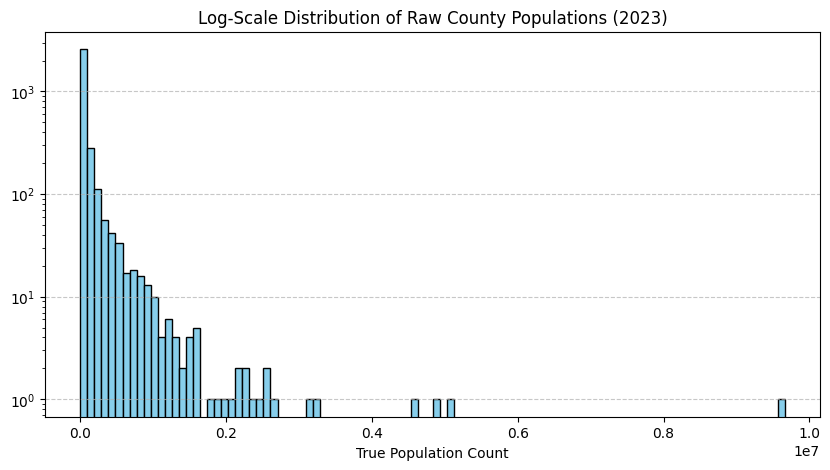

In [11]:
#population distribution
plt.figure(figsize=(10, 5))
plt.hist(df_pop['total_population'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Log-Scale Distribution of Raw County Populations (2023)')
plt.xlabel('True Population Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('population_raw_distribution.png')

In [12]:
#normalizing the population distribution
scaler = MinMaxScaler()
df_pop['total_population_norm'] = scaler.fit_transform(df_pop[['total_population']])
df_pop['total_population']

,total_population
126,60342.0
191,253507.0
256,24585.0
321,21868.0
386,59816.0
...,...
208188,53527.0
208197,7999.0
208206,21285.0
208215,28897.0


In [14]:
#required features
df_pop_final = df_pop[['fips_code', 'state', 'area_name', 'total_population', 'total_population_norm']]
df_pop_final

,fips_code,state,area_name,total_population,total_population_norm
126,01001,AL,Autauga County,60342.0,0.006240
191,01003,AL,Baldwin County,253507.0,0.026230
256,01005,AL,Barbour County,24585.0,0.002540
321,01007,AL,Bibb County,21868.0,0.002259
386,01009,AL,Blount County,59816.0,0.006186
...,...,...,...,...,...
208188,72145,PR,Vega Baja Municipio,53527.0,0.005535
208197,72147,PR,Vieques Municipio,7999.0,0.000823
208206,72149,PR,Villalba Municipio,21285.0,0.002198
208215,72151,PR,Yabucoa Municipio,28897.0,0.002986


In [15]:
df_pop_final.to_csv('cleaned_population_estimates.csv', index=False)